## Face recognition
https://deepstackpython.readthedocs.io/en/latest/getting-started.html

Run with:
```
sudo docker run -e VISION-FACE=True -v localstorage:/datastore -p 5000:5000 deepquestai/deepstack
```

Note that `detection` and `recogntion` are the same docker run, but different models?

In [2]:
import requests
import matplotlib.pyplot as plt 
from PIL import Image
%matplotlib inline

IP = "localhost"
PORT = "5000"

In [3]:
ls

Deepstack face dev.ipynb          face_1.jpg
Deepstack object detection.ipynb  face_2.jpg
adele_test.jpg                    face_3.jpg
adele_train.jpg                   family.jpg
face_0.jpg                        test-image3.jpg


In [4]:
img_file = "family.jpg"

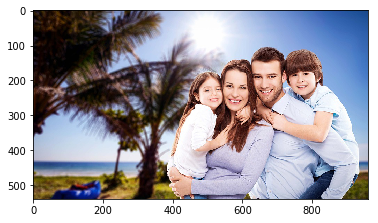

In [5]:
image = Image.open(img_file).convert("RGB")
plt.imshow(image);

Now post the data to Deepstack

In [6]:
image_data = open(img_file,"rb").read()
#response = requests.post(f"http://{IP}:{PORT}/v1/vision/detection", files={"image":image_data}) # detection
response = requests.post(f"http://{IP}:{PORT}/v1/vision/face/recognize", files={"image":image_data}) # recognition

In [7]:
response.status_code

200

In [8]:
response.json()["predictions"]

[{'confidence': 0.50093853,
  'userid': 'Adele',
  'y_min': 174,
  'x_min': 534,
  'y_max': 303,
  'x_max': 629},
 {'confidence': 0,
  'userid': 'unknown',
  'y_min': 146,
  'x_min': 616,
  'y_max': 275,
  'x_max': 711},
 {'confidence': 0,
  'userid': 'unknown',
  'y_min': 147,
  'x_min': 729,
  'y_max': 259,
  'x_max': 811},
 {'confidence': 0,
  'userid': 'unknown',
  'y_min': 190,
  'x_min': 471,
  'y_max': 290,
  'x_max': 549}]

## Train
Lets now train on a picture of Adele

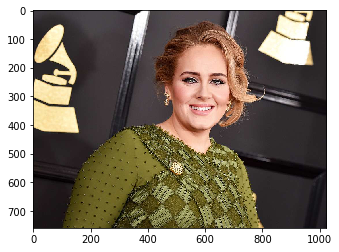

In [9]:
adele_train = Image.open('adele_train.jpg').convert("RGB")
plt.imshow(adele_train);

In [10]:
response = requests.post(f"http://{IP}:{PORT}/v1/vision/face/register",files={"image":open("adele_train.jpg","rb").read()}, data={"userid":"Adele"})

In [11]:
response.json()

{'success': True, 'message': 'face updated'}

Now test

In [12]:
test_image = open("adele_test.jpg","rb").read()

response = requests.post(f"http://{IP}:{PORT}/v1/vision/face/recognize",files={"image":test_image})
response.json()

{'success': True,
 'predictions': [{'confidence': 0.47628152,
   'userid': 'Adele',
   'y_min': 45,
   'x_min': 126,
   'y_max': 271,
   'x_max': 295}]}

In [13]:
for prediction in response.json()['predictions']:
    print(prediction['userid'], round(prediction['confidence']*100, 1))

Adele 47.6


In [14]:
def get_predicted_faces(predictions):
    """
    Get the predicted faces and their confidence.
    """
    return {face['userid']: round(face['confidence']*100, 1) for face in predictions}

In [15]:
get_predicted_faces(response.json()['predictions'])

{'Adele': 47.6}